# Introduction

The goal of this project is to see if there is any correlation between the Gross domestic product, which is the monetary value of all goods and services made in a country during a specific period (GDP), of a country and the life expectancy.

**Questions to answer:**
+ Is there a correlation between life expectancy and the GDP of a country
+ What is the average life expectancy in each country? 
+ What is the average GDP of each counrty?
+ Has the GDP increased or decreased over time in each country?
+ Has life expectancy increased or decreased over time in each country?


**Data Sources:**
+ GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

+ Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

# Imports

Importing Python modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading The Data

Here the CSV **all_data.csv** will be read into the DataFrame 'data' and '.head(8)' will be used to check the first 8 entries to get an understanding of the data.

In [2]:
data = pd.read_csv('all_data.csv')

print(data.head(8))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
5   Chile  2005                              78.4  1.229650e+11
6   Chile  2006                              78.9  1.547880e+11
7   Chile  2007                              78.9  1.736060e+11


# Exploring The Data

Here '.dtypes' is used to see the columns and the types of data they contain, '.shape' shows the number of columns followed by the number of rows. Next 'country_list' takes all the unique Country values and creates a list with '.tolist()' so that it can be used to create visualization later on. 
After that 'data.rename' renames the column 'Life expectancy at birth (years) to LEY to make it more managable for later use.

The print statement below shows a list of all the years in this particular data set.

In [41]:
print(data.dtypes)
print(data.shape)

Country     object
Year         int64
LEY        float64
GDP        float64
dtype: object
(96, 4)


In [4]:
country_list = data.Country.unique().tolist()
print(country_list)

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']


In [5]:
data = data.rename(columns = {"Life expectancy at birth (years)": "LEY"})
print(data.columns)

Index(['Country', 'Year', 'LEY', 'GDP'], dtype='object')


In [6]:
print('Year List: ', data.Year.unique().tolist())

Year List:  [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


# Exploring The Data Through Plots

Exploring the data through plots often gives a better understanding of the data. The first plot below show the relationship between GDP and life expectancy. This plot already seems to show a correlation between the two. While Zimbabwe's GDP seems to stay flat as the life expectancy rises the other countries do rise in GDP as life expectancy goes up. Taking a closer look at each country may give a better idea of the correlation between GDP and life expectancy.

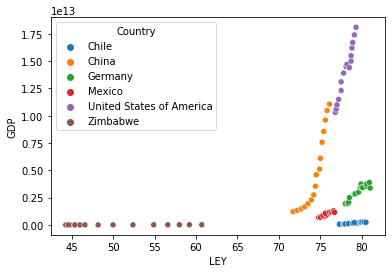

<Figure size 432x288 with 0 Axes>

In [14]:
sns.scatterplot(data = data, x = 'LEY', y = 'GDP', hue = 'Country')
plt.show()
plt.clf()

The two plots below show the distribution of GDP and life expectancy. The GDP distribution is skewed right while the life expectancy plot is skewed left

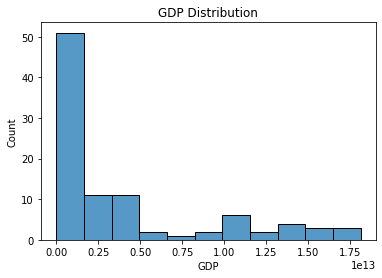

In [8]:
sns.histplot(data.GDP)
plt.title('GDP Distribution')
plt.show()

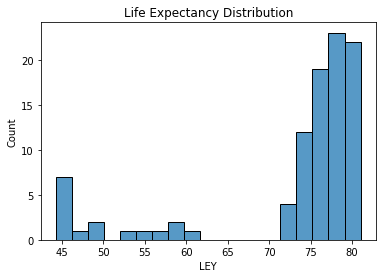

In [9]:
sns.histplot(data.LEY)
plt.title('Life Expectancy Distribution')
plt.show()

# GDP & Life Expectancy For Each Country

Below each country is plotted into it's own scatter plot. Taking a closer look at each country in the data set shows that there is a positive correlation between GDP and life expectancy. It seems China had some pretty intense growth.

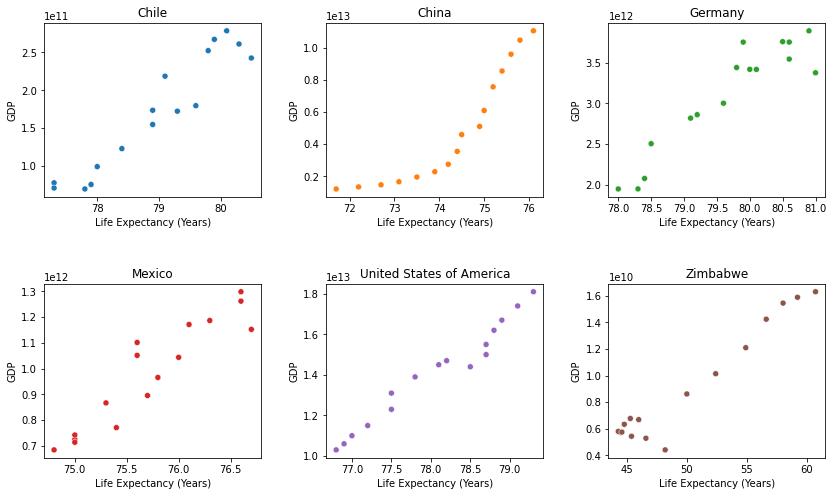

In [10]:
plt.figure(figsize = (14, 8))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

for i in range(6):
    plot_num = i+1
    plt.subplot(2, 3, plot_num)
    sns.scatterplot(data = data, x = 'LEY', y = data.GDP[data.Country == country_list[i]], hue = 'Country')
    plt.title(country_list[i])
    plt.xlabel('Life Expectancy (Years)')
    plt.legend().set_visible(False)

plt.show()
    


The following two plots show the GDP over the years as and the life expectancty over the years. Looking first at the GDP over the years, it is easy to see that both China and the US both have large gains over the years while other countries didnt have quite as much growth. Looking at the plot for life expectancy every country increased however Zimbabwe had the biggest increase.

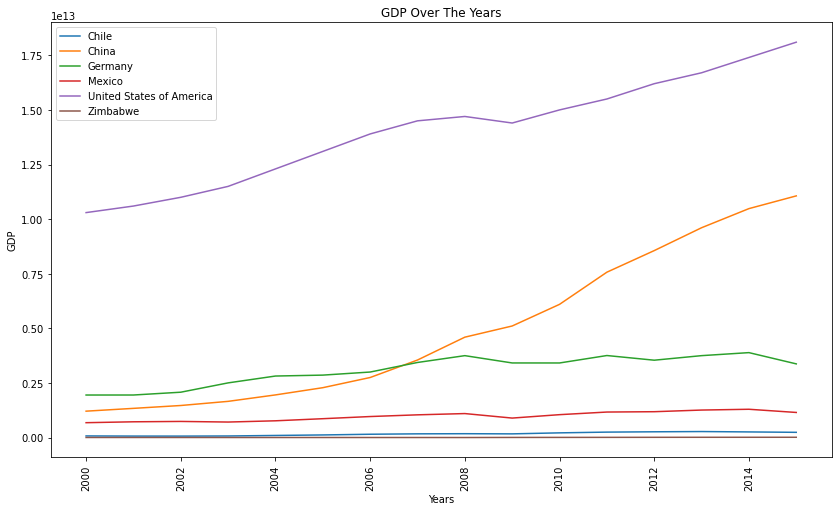

In [11]:
plt.figure(figsize = (14, 8))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

sns.lineplot(data = data, x = 'Year', y = data.GDP, hue = 'Country')
plt.title('GDP Over The Years')
plt.xlabel('Years')
plt.xticks(rotation = 90)    
plt.legend()
plt.show()

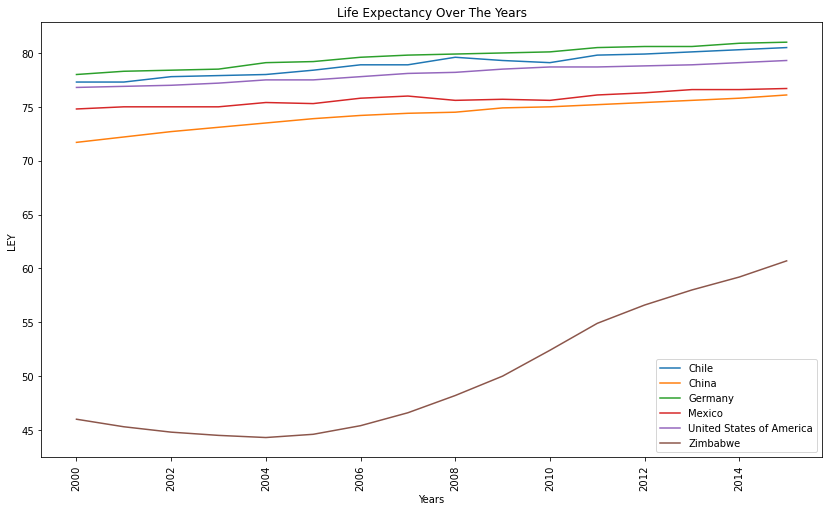

In [12]:
plt.figure(figsize = (14, 8))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

sns.lineplot(data = data, x = data.Year, y = data.LEY, hue = 'Country')
plt.title('Life Expectancy Over The Years')
plt.xlabel('Years')
plt.xticks(rotation = 90)    
plt.legend()
plt.show()

Taking a closer look at the line plots above by looking at each individual country the plots show each country has seen a rise in GDP over the years likewise it can be seen that life expectancy over the years has gone up. In both DGP and life expectancy over the years both Chile and Mexico had some dips that could be further looked into, it's possible that something happened in those countries that caused the dips around those times.

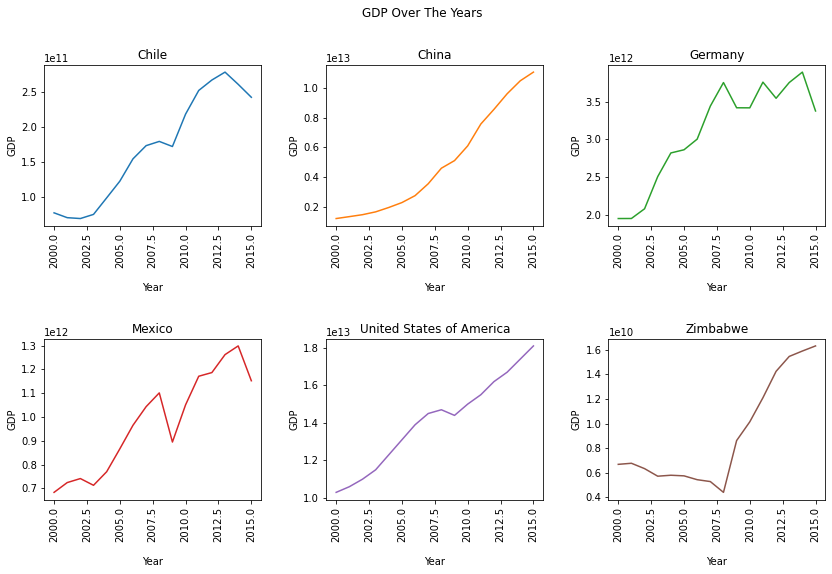

In [39]:
plt.figure(figsize = (14, 8))
plt.subplots_adjust(wspace = 0.3, hspace = 0.7)
plt.suptitle('GDP Over The Years')

for i in range(6):
    plot_num = i+1
    plt.subplot(2, 3, plot_num)
    sns.lineplot(data = data, x = 'Year', y = data.GDP[data.Country == country_list[i]], hue = 'Country')
    plt.title(country_list[i])
    plt.xlabel('Year', labelpad = 15)
    plt.xticks(rotation = 90)
    plt.legend().set_visible(False)

plt.show()

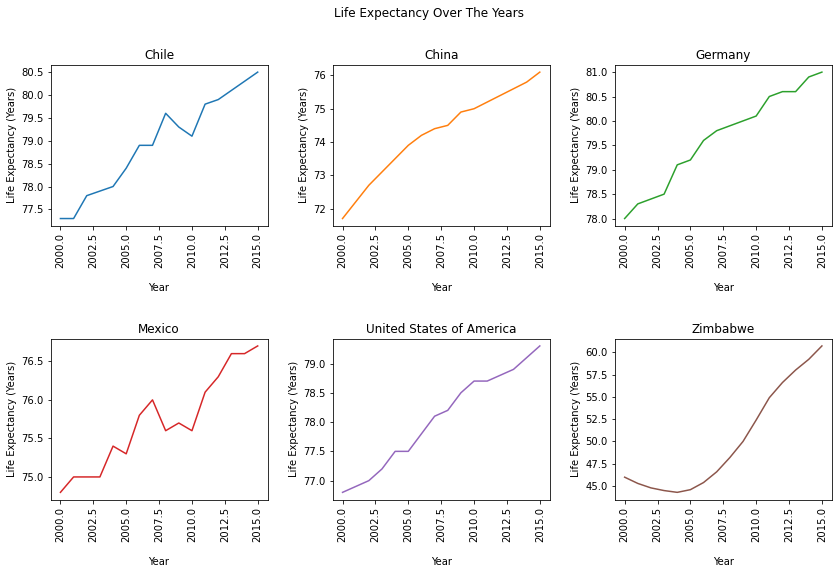

In [40]:
plt.figure(figsize = (14, 8))
plt.subplots_adjust(wspace = 0.3, hspace = 0.7)
plt.suptitle('Life Expectancy Over The Years')

for i in range(6):
    plot_num = i+1
    plt.subplot(2, 3, plot_num)
    sns.lineplot(data = data, x = 'Year', y = data.LEY[data.Country == country_list[i]], hue = 'Country')
    plt.title(country_list[i])
    plt.xlabel('Year', labelpad = 15)
    plt.xticks(rotation = 90)
    plt.ylabel('Life Expectancy (Years)')
    plt.legend().set_visible(False)


plt.show()

The final two plots show average life expectancy and average GDP for each country. Average life expectancy for each country is between 70 - 80 years for every country except for Zimbabwe which is around 50 years. This could be the reason for the skew in the distribution plots. In the average GDP plot the US has this highest GDP around 1.4 trillion USD and every other country falls below the 0.6 trillion USD mark. Chile and Zimbabwe have the lowest average GDP.

   Country       LEY           GDP
0    Chile  78.94375  1.697888e+11
1    China  74.26250  4.957714e+12
2  Germany  79.65625  3.094776e+12


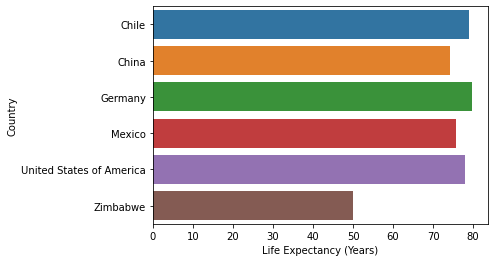

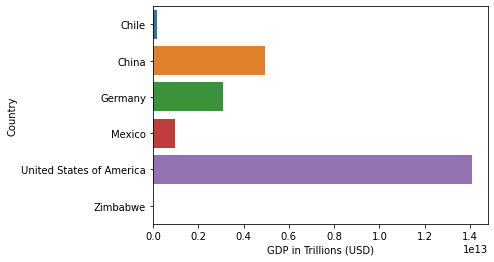

In [13]:
data_mean = data.drop('Year', axis = 1).groupby('Country', as_index = False).mean()
print(data_mean.head(3))


sns.barplot(x = 'LEY', y = 'Country', data = data_mean)
plt.xlabel('Life Expectancy (Years)')
plt.show()

sns.barplot(x = 'GDP', y = 'Country', data = data_mean)
plt.xlabel('GDP in Trillions (USD)')
plt.show()



# Conclusions 

+ Is there a correlation between life expectancy and the GDP of a country?
    + Yes there is a correlation between life expectancy and GDP.
+ What is the average life expectancy in each country?
    + Most countries have an average life expectancy between 70 - 80 years while Zimbabwe has an average of around 50 years.
+ What is the average GDP of each counrty?
    + The average GDP in every county is below 0.6 trillion USD, with Chile and Zimbabwe below 0.1 trillion and the US around 1.4 trillion.
+ Has the GDP increased or decreased over time in each country?
     + GDP has increased in every country, with China having a notable increase.
+ Has life expectancy increased or decreased over time in each country?
    + GDP has increased in every country, with Zimbabwe seeing the greatest increase.